<a href="https://colab.research.google.com/github/SimranaSinha/Masters-Project-FDA/blob/main/Simran_Sinha_Project_3_FDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

Libraries

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading the dataset

Mounting Google Drive into the Colab environment will enable easy file handling and facilitate operations such as reading, writing, and manipulation.

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Research/Datasets/Project3_Keywords.csv')

In [ ]:
data.head()

,Authors,Title,Keywords,Abstract,Publisher,Publication Date,Volume,Issue,DOI,pages
0,"Tortora, L",Beyond Discrimination: Generative AI Applicati...,forensic psychiatry; forensic AI; generative A...,The advent and growing popularity of generativ...,FRONTIERS MEDIA SA,MAR 8,15.0,NaN,10.3389/fpsyt.2024.1346059,13
1,"Bernstein, MS; Park, JS; Morris, MR; Amershi, ...",Architecting Novel Interactions With Generativ...,HCI; AI; Generative AI; Human-AI Interaction,The new generation of generative AI models off...,ASSOC COMPUTING MACHINERY,NaN,NaN,NaN,10.1145/3586182.3617431,3
2,"Kalota, F",A Primer on Generative Artificial Intelligence,artificial intelligence; AI; generative artifi...,Many educators and professionals in different ...,MDPI,FEB,14.0,2,10.3390/educsci14020172,15
3,"Zimmermann, A",The Generative AI Deployment Rush: How to Demo...,AI deployment; generative AI; political philos...,NaN,ASSOC COMPUTING MACHINERY,NaN,NaN,NaN,10.1145/3600211.3607545,1
4,"Pedersen, I",The rise of generative AI and enculturating AI...,generative AI; education; culture; AI writing;...,NaN,FRONTIERS MEDIA SA,AUG 10,6.0,NaN,10.3389/frai.2023.1259407,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Authors           500 non-null    object 
 1   Title             500 non-null    object 
 2   Keywords          500 non-null    object 
 3   Abstract          466 non-null    object 
 4   Publisher         500 non-null    object 
 5   Publication Date  326 non-null    object 
 6   Volume            313 non-null    float64
 7   Issue             197 non-null    object 
 8   DOI               488 non-null    object 
 9   pages             500 non-null    int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


In [ ]:
data.isna().sum()

Authors               0
Title                 0
Keywords              0
Abstract             34
Publisher             0
Publication Date    174
Volume              187
Issue               303
DOI                  12
pages                 0
dtype: int64

In [ ]:
'Keywords' in data.columns

True

In [ ]:
Splitting_columns = data['Keywords'].str.split(';', expand=True)

In [ ]:
Splitting_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,forensic psychiatry,forensic AI,generative AI,generative artificial intelligence,discriminative AI,ethical AI,large language models,large generative AI models,None,None,...,None,None,None,None,None,None,None,None,None,None
1,HCI,AI,Generative AI,Human-AI Interaction,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,artificial intelligence,AI,generative artificial intelligence,generative AI,GAI,GenAI,Gen-AI,ChatGPT,LLM,GPT,...,AI education,AI ethics,AI security,None,None,None,None,None,None,None
3,AI deployment,generative AI,political philosophy of AI,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,generative AI,education,culture,AI writing,hype,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Converting all the words in the expanded keywords dataframe to lower case.

In [ ]:
lowercase = Splitting_columns.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [ ]:
# Previewing the dataframe with all words in lower case.
lowercase.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,forensic psychiatry,forensic ai,generative ai,generative artificial intelligence,discriminative ai,ethical ai,large language models,large generative ai models,None,None,...,None,None,None,None,None,None,None,None,None,None
1,hci,ai,generative ai,human-ai interaction,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,artificial intelligence,ai,generative artificial intelligence,generative ai,gai,genai,gen-ai,chatgpt,llm,gpt,...,ai education,ai ethics,ai security,None,None,None,None,None,None,None
3,ai deployment,generative ai,political philosophy of ai,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,generative ai,education,culture,ai writing,hype,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Calculating frequency distribution

In [ ]:
# Flatten the dataframe to a single list of all words, excluding None values
Every_words = lowercase.stack().tolist()

# Calculate the frequency distribution
word_freq = Counter(Every_words)

# Convert the Counter object to a dataframe for better readability
frequency_words = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
frequency_words.head()

,Word,Frequency
2,generative ai,361
15,chatgpt,132
11,artificial intelligence,109
6,large language models,61
9,ai,46


In [1]:
# Define a list of search terms
search_terms = ["generative adversarial networks", "generative AI", "deep learning", "neural networks", "machine learning", "artificial intelligence", "computer vision", "natural language processing", "recommender systems", "image processing", "data generation", "synthetic data", "style transfer", "autoencoders", "variational autoencoders", "GANs", "DCGANs", "CycleGANs", "BigGANs", "ProGANs", "StyleGANs", "StyleGAN2", "image-to-image translation", "text generation", "music generation", "video generation", "3D generation", "graph generation", "sequence generation", "time-series generation", "audio generation", "speech generation", "language generation", "translation", "summarization", "text-to-speech", "synthetic data generation", "data augmentation", "data imputation", "data simulation", "data privacy", "data security", "federated learning", "multi-agent systems", "reinforcement learning", "deep reinforcement learning", "transfer learning", "few-shot learning", "one-shot learning", "zero-shot learning", "meta-learning", "unsupervised learning", "semi-supervised learning", "active learning", "online learning", "self-supervised learning", "weakly-supervised learning", "adversarial learning", "contrastive learning", "representation learning", "feature learning", "unfolding", "optimization", "computational creativity", "creative AI", "computational art", "computational design", "computational photography", "computational journalism", "computational social science", "computational economics", "computational sustainability", "computational ecology", "computational neuroscience", "computational biology", "computational chemistry", "computational physics", "computational mathematics", "computational linguistics", "computational social choice", "computational logic", "computational complexity", "computational geometry", "computational"]

# Co-occurrence Network Subgraph

Plotting the graph

In [ ]:
# Initialize an undirected graph
S = nx.Graph()

# Loop over each row of the dataframe and add edges between every pair of keywords inside a row.
for index, row in lowercase.iterrows():
    # Filter out None values and convert to a list
    keywords_list = [keyword for keyword in row if keyword is not None]

    #Include nodes and edges for each keyword on the list.
    for i in range(len(keywords_list)):
        for j in range(i + 1, len(keywords_list)):
            # If the edge already exists, increment the weight
            if S.has_edge(keywords_list[i], keywords_list[j]):
                S[keywords_list[i]][keywords_list[j]]['weight'] += 1
            else:
                S.add_edge(keywords_list[i], keywords_list[j], weight=1)

# Let's obtain some fundamental information about the graph in order to comprehend its size and complexity.
print(S)

Graph with 1605 nodes and 7763 edges


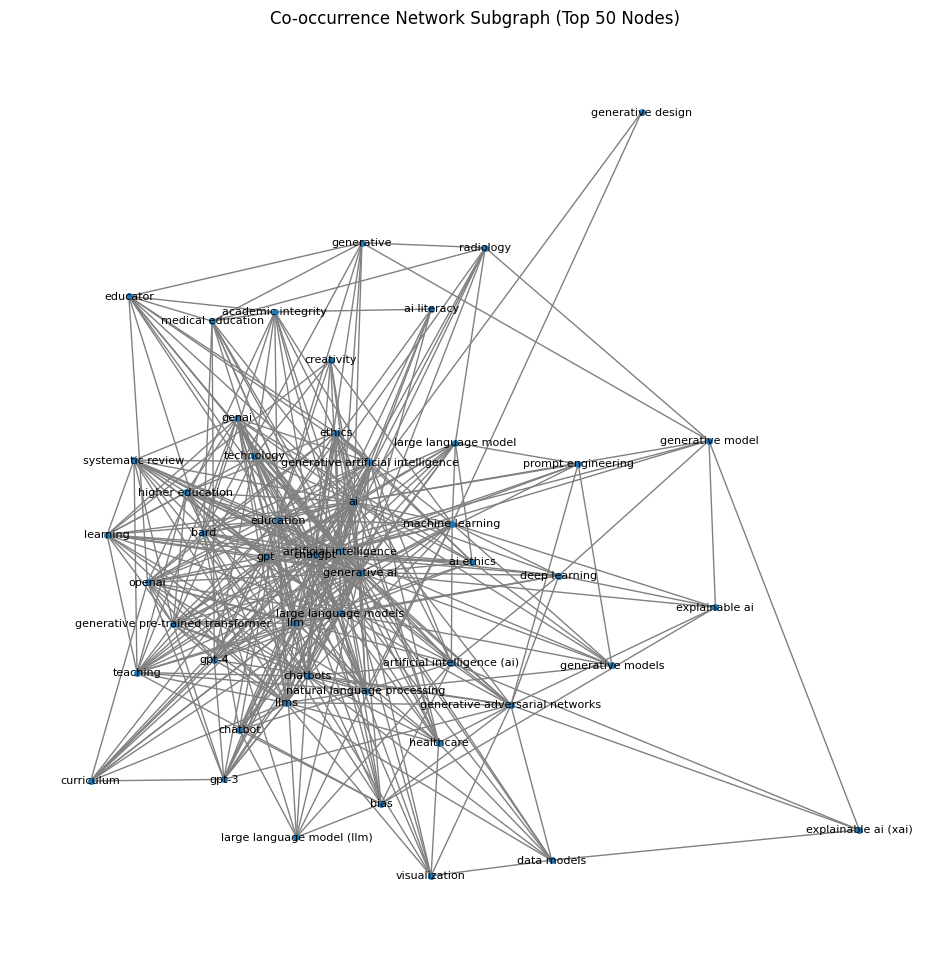

In [ ]:
# Since the graph is large, plotting it directly may not be very informative due to overplotting.
# For demonstration, we'll plot a smaller subgraph of the 50 most connected nodes.
subgraph_nodes = sorted(S.degree, key=lambda x: x[1], reverse=True)[:50]
subgraph = S.subgraph([node[0] for node in subgraph_nodes])

# Plotting the subgraph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph, seed=42)  # For consistent layout
nx.draw_networkx(subgraph, pos, node_size=20, with_labels=True, font_size=8, edge_color="gray", linewidths=0.5)
plt.title("Co-occurrence Network Subgraph (Top 50 Nodes)")
plt.axis('off')  # Turn off the axis
plt.show()

# Identification of Key Research Themes

In [ ]:
# Calculating the adjacency matrix of the entire graph
adj_matrix = nx.adjacency_matrix(S)

# Converting the adjacency matrix to a DataFrame for better readability
adj_matrix_df = pd.DataFrame(adj_matrix.todense(), index=S.nodes(), columns=S.nodes())

# Since the adjacency matrix is large, displaying the whole matrix isn't practical. Let's show a small portion.
adj_matrix_df.iloc[:10, :10]

,forensic psychiatry,forensic ai,generative ai,generative artificial intelligence,discriminative ai,ethical ai,large language models,large generative ai models,hci,ai
forensic psychiatry,0,1,1,1,1,1,1,1,0,0
forensic ai,1,0,1,1,1,1,1,1,0,0
generative ai,1,1,0,8,1,2,56,1,1,23
generative artificial intelligence,1,1,8,0,1,1,4,1,0,5
discriminative ai,1,1,1,1,0,1,1,1,0,0
ethical ai,1,1,2,1,1,0,2,1,0,0
large language models,1,1,56,4,1,2,0,1,0,7
large generative ai models,1,1,1,1,1,1,1,0,0,0
hci,0,0,1,0,0,0,0,0,0,1
ai,0,0,23,5,0,0,7,0,1,0


In [ ]:
# Summing the values in each row of the adjacency matrix to get the count of co-occurrence for each keyword with other keywords
cooccurrence_count_by_keyword = adj_matrix.sum(axis=1)

# Converting the result to a DataFrame for better readability
cooccurrence_count_df = pd.DataFrame(cooccurrence_count_by_keyword, index=S.nodes(), columns=['Co-occurrence Count'])

# Displaying the DataFrame
print(cooccurrence_count_df)

                                    Co-occurrence Count
forensic psychiatry                                   7
forensic ai                                           7
generative ai                                      1803
generative artificial intelligence                  136
discriminative ai                                     7
...                                                 ...
spanish writing assistants                            4
language didactics                                    4
generative ai chatbots                                4
training of language model                            4
human-assisted intelligence                           4

[1605 rows x 1 columns]
